**The dataset provides information related to airline passenger, including details about their demographics, travel preferences, flight experiences, and satisfaction levels. Now we will analyze the dataset to understand how various factors contribute to impact customer satisfaction with airline services.**

**IMPORTING NECESSARY LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Now we are reading the data in the form of CSV**

In [2]:
#Reading the data.
airline = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/airline_passenger_satisfaction.csv')

**Exploring the dataset and there datatype.**

In [3]:
airline.info() #Exploring the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

**Showing the top5 columns & rows of the data.**

In [4]:
airline.head(5) #top5 columns & rows of the data.

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


**Checking for the missing values.**

In [5]:
airline.isnull().sum() #Checking for the missing values.

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

**Question 1: What is the pattern of flight distances in the dataset?**

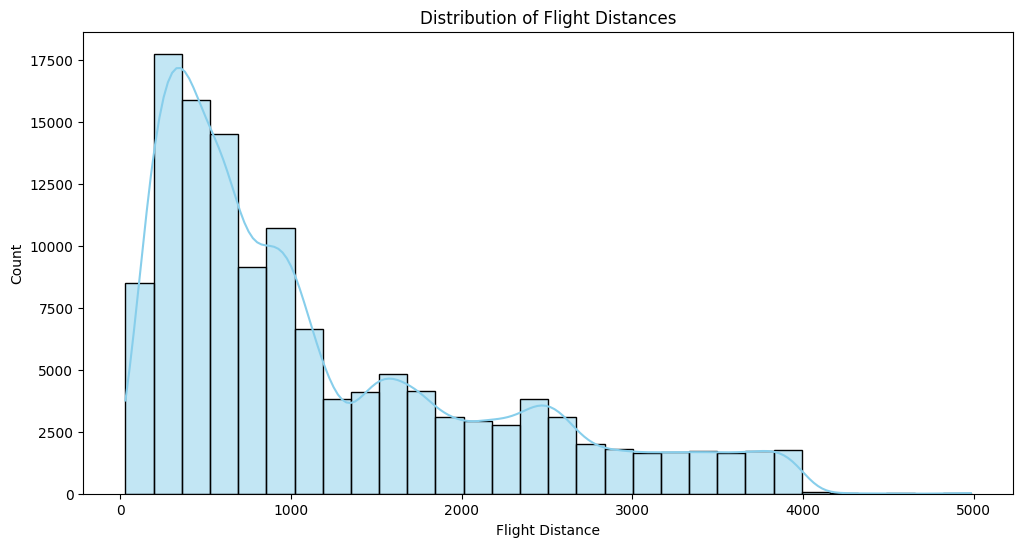

In [6]:
#Creating a distribution of flight distance,
plt.figure(figsize=(12, 6))
sns.histplot(airline['Flight Distance'], 
             bins=30, kde=True, color='skyblue') #Creating a plot
plt.title('Distribution of Flight Distances') #labeling the title
plt.xlabel('Flight Distance') #labeling the xlabel.
plt.show()


**Based on the plot, it seems that most flights have relatively shorter distances while there are a smaller number of flights that cover longer distances, indicating a right-skewed pattern in flight distances.**

**Question 2: What is the distribution of gender in the airline passenger dataset?**

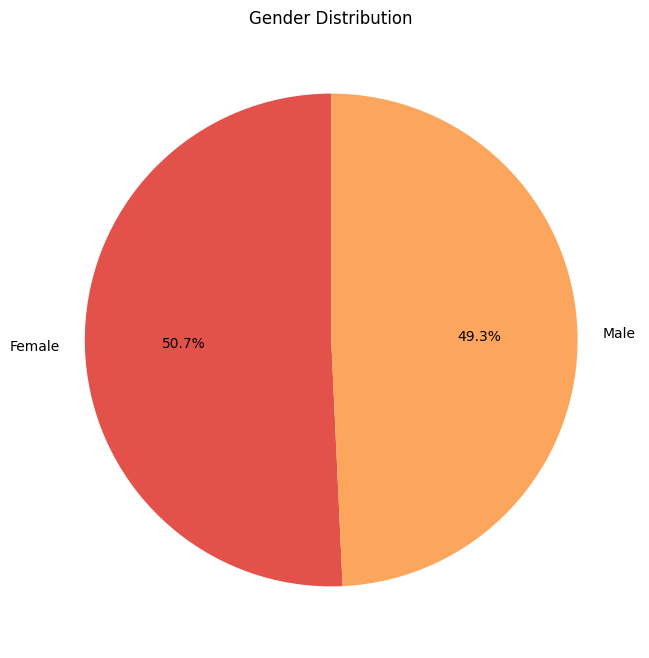

In [7]:
# Pie chart for Gender distribution
gender_counts = airline['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Spectral")) #Creating a pie chart.
plt.title('Gender Distribution') #labeling the title.
plt.show()


**According to the pie chart, female passengers make up the highest percentage in the overall distribution, while males account for a smaller percentage.**

**Question 3: How does customer satisfaction vary based on the type of customer?**

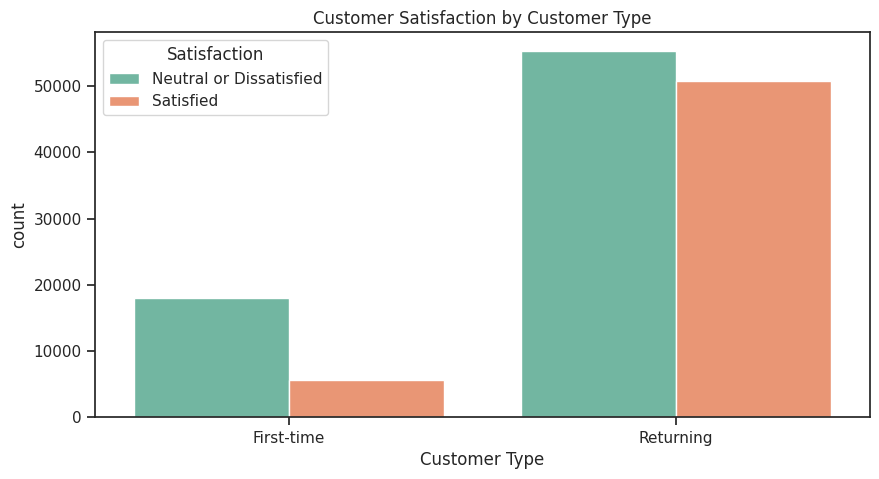

In [8]:
#Customer satisfaction by customer type
sns.set(style="ticks") #Creating a bankground.
plt.figure(figsize=(10, 5))
sns.countplot(x='Customer Type', hue='Satisfaction', 
              data=airline,palette='Set2')# Creating a plot based on customer type.
plt.title('Customer Satisfaction by Customer Type') #labeling the title.
plt.show()

**The countplot displays the number of satisfied and dissatisfied customers, placing them into different categories based on their loyalty status.**

**Question 4: How does customer satisfaction vary based on the type of travel?**

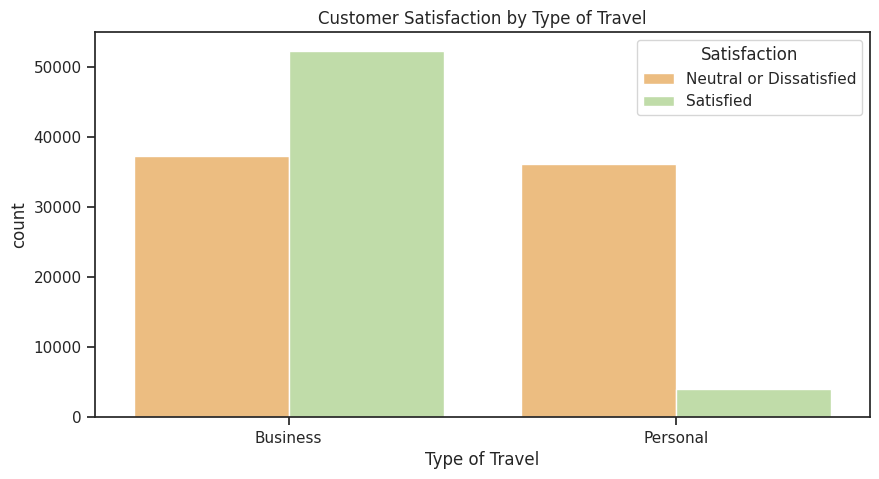

In [9]:
#Customer satisfaction by type of travel
sns.set(style="ticks") #Creating a bankground.
plt.figure(figsize=(10, 5))
sns.countplot(x='Type of Travel', hue='Satisfaction', 
              data=airline, palette= 'Spectral') # Creating a plot based on travel type.
plt.title('Customer Satisfaction by Type of Travel') #labeling the title.
plt.show()



**The plot shows customer satisfaction by type of travel, It shows how customer satisfaction change between business and personal trips.**

**Question 5: How is the customer satisfaction distributed across different travel classes (Eco, Business, Eco Plus)?**

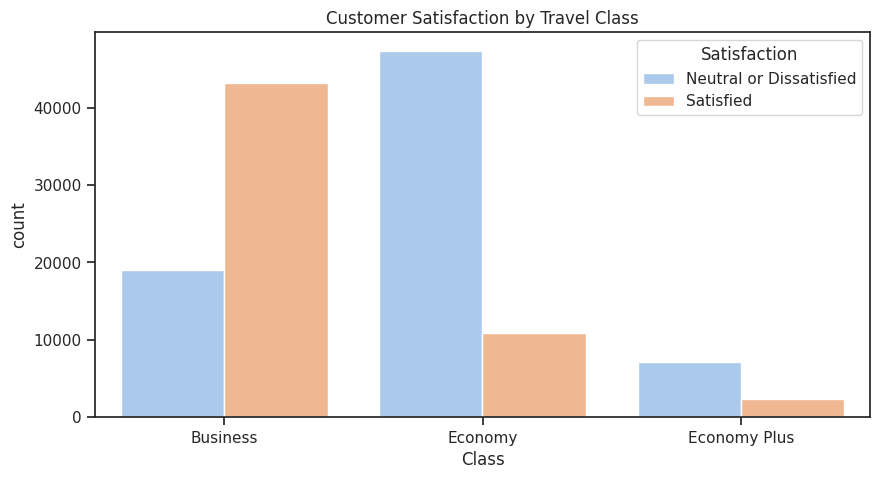

In [10]:
sns.set(style="ticks")
plt.figure(figsize=(10, 5)) #Creating a bankground.
sns.countplot(x='Class', hue='Satisfaction', 
              data=airline, palette = 'pastel') # Creating a plot based on travel class.
plt.title('Customer Satisfaction by Travel Class') #labeling the title.
plt.show()


**The plot shows customer satisfaction by type of travel class, It shows how customer satisfaction change between each travel class.**


**Question 5: Predict Airline Customer Satisfaction using RandomForestClassifier**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Preprocessing
le = LabelEncoder()
airline['Gender'] = le.fit_transform(airline['Gender'])
airline['Customer Type'] = le.fit_transform(airline['Customer Type'])
airline['Type of Travel'] = le.fit_transform(airline['Type of Travel'])
airline['Class'] = le.fit_transform(airline['Class'])
airline['Satisfaction'] = le.fit_transform(airline['Satisfaction'])

# Dropping ID and Arrival Delay columns
airline = airline.drop(['ID', 'Arrival Delay'], axis=1)

# Splitting the data into features and target
X = airline.drop('Satisfaction', axis=1)
y = airline['Satisfaction']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.962580843855867

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



**we utilized a RandomForestClassifier to predict customer satisfaction based on various features from an airline dataset. The data preprocessing involved encoding categorical variables like 'Gender', 'Customer Type', 'Type of Travel', 'Class', and 'Satisfaction' using LabelEncoder. We also removed non-essential columns such as 'ID' and 'Arrival Delay' to focus on more relevant features.**

**In summary, the visualizations provide insights into the distribution of flight distances, gender representation, and how customer satisfaction varies based on customer type, type of travel, and travel class. These insights can help in understanding patterns and areas for potential improvement in airline services.**